In [18]:
from sdss import SDSS
import mikkel_tools.utility as mt_util
import plot as sds_plt

import numpy as np
import matplotlib.pyplot as plt

In [2]:
comment = "first try with new setup"

seqsim = SDSS(comment, N_grid = 1000, N_SH = 60, sim_type = "core", sat_height = 350)

seqsim.grid_even_spaced(grid_size=3.0, r_at = 1)
seqsim.grid_glq(nmax = 60, r_at = 1)

grid_in = np.array([seqsim.grid_glq_phi, 90-seqsim.grid_glq_theta]).T
print(grid_in.shape)
seqsim.grid(seqsim.r_cmb, grid_in, calc_sph_d = True)

(7381, 2)


In [3]:
print(seqsim)


______current attributes______

a:                   6371.2
r_sat:               6721.2
r_cmb:               3480.0
rad:                 0.017453292519943295
mu0:                 1.2566370614359173e-06
comment:             first try with new setup
class_abs_path:      C:\Users\Mikkel Otzen\OneDrive - Danmarks Tekniske Universitet\PhD\spherical_direct_sequential_simulation
N_grid:              7381
N_SH:                60
sim_type:            core
grid_even_theta_len: 60
grid_even_phi_len:   120
grid_even_shape:     (2,), Max/Min: 120.00 / 60.00
grid_even_theta:     (7200,), Max/Min: 178.50 / 1.50
grid_even_phi:       (7200,), Max/Min: 358.50 / 1.50
grid_even_radial:    (7200,), Max/Min: 1.00 / 1.00
grid_glq_zero:       (61,), Max/Min: 1.00 / -1.00
grid_glq_w:          (61,), Max/Min: 0.05 / 0.00
grid_glq_shape:      (2,), Max/Min: 121.00 / 61.00
grid_glq_radial:     (7381,), Max/Min: 1.00 / 1.00
grid_glq_theta:      (7381,), Max/Min: 177.76 / 2.24
grid_glq_phi:        (7381,), Max/Min

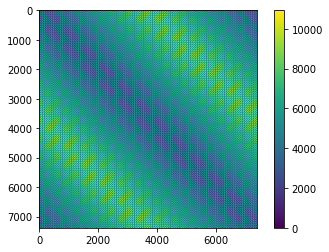

In [5]:
plt.figure()
plt.imshow(seqsim.sph_d)
plt.colorbar()

In [6]:
seqsim.generate_map()

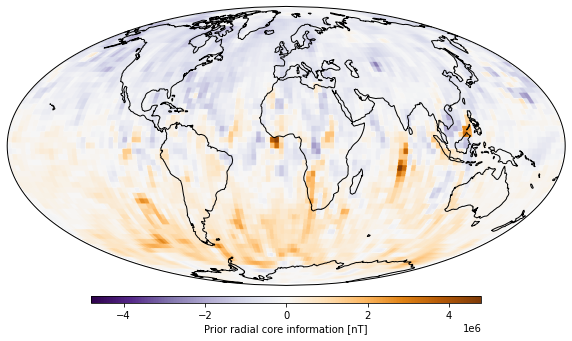

In [9]:
mt_util.plot_cartopy_global(data=seqsim.data, shift_grid = True, transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', title="Prior radial core information")

In [15]:
seqsim.condtab()
seqsim.semivar(model_lags = 'all', model = "exponential", max_dist = 4500, lag_length = 50, zero_nugget = True)


____semi-variogram setup___

Number of data used: 20560925
Max data distance: 4499.680 km
Lag length chosen: 50.0 km
Number of lags: 89
Number of modelling lags: all

Semi-variogram model determined, starting LUT computation



In [16]:
print(seqsim)


______current attributes______

a:                     6371.2
r_sat:                 6721.2
r_cmb:                 3480.0
rad:                   0.017453292519943295
mu0:                   1.2566370614359173e-06
comment:               first try with new setup
class_abs_path:        C:\Users\Mikkel Otzen\OneDrive - Danmarks Tekniske Universitet\PhD\spherical_direct_sequential_simulation
N_grid:                7381
N_SH:                  60
sim_type:              core
grid_even_theta_len:   60
grid_even_phi_len:     120
grid_even_shape:       (2,), Max/Min: 120.00 / 60.00
grid_even_theta:       (7200,), Max/Min: 178.50 / 1.50
grid_even_phi:         (7200,), Max/Min: 358.50 / 1.50
grid_even_radial:      (7200,), Max/Min: 1.00 / 1.00
grid_glq_zero:         (61,), Max/Min: 1.00 / -1.00
grid_glq_w:            (61,), Max/Min: 0.05 / 0.00
grid_glq_shape:        (2,), Max/Min: 121.00 / 61.00
grid_glq_radial:       (7381,), Max/Min: 1.00 / 1.00
grid_glq_theta:        (7381,), Max/Min: 177.76 / 

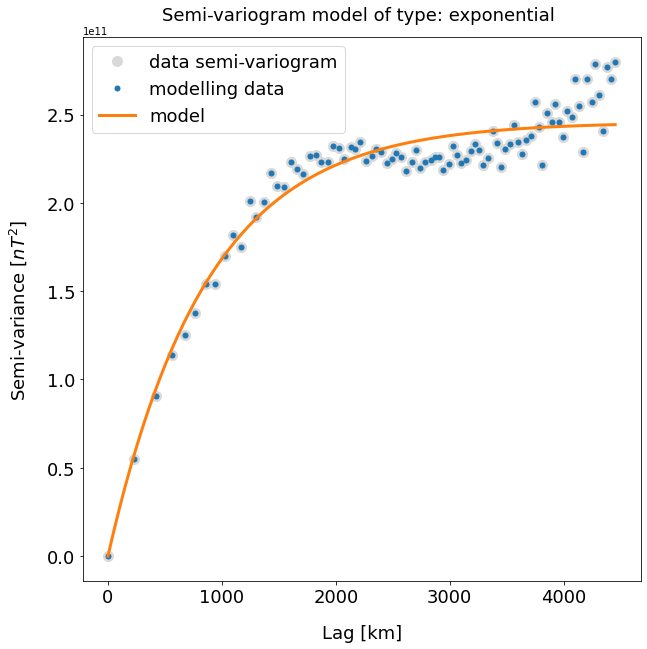

In [19]:
#%% PLOT SEMI-VARIOGRAM
semivar = {"semi-variogram LUT":seqsim.sv_lut, "total data lags":seqsim.lags, "total data sv":seqsim.pics, "model data lags":seqsim.lags_model, "model data sv":seqsim.pics_model, "model names":seqsim.model_names, "sv model y":seqsim.sv_curve, "sv model x":seqsim.lags_sv_curve, "sv model":seqsim.model, "a":seqsim.a, "C0":seqsim.C0, "C1":seqsim.C1, "C2":seqsim.C2, "C3":seqsim.C3, "n_lags":seqsim.n_lags, "max_cloud":seqsim.max_cloud, "sph_d_sorted":seqsim.sph_d_sorted, "sort_d":seqsim.sort_d}
sds_plt.plots('model_semi_variogram_new', semivar)